In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [3]:
import pandas as pd
import seaborn as sns
print(sns.__version__)

0.9.0


In [20]:
plot_data = {}

Text(0,0.5,'Cumulative percent of counts')

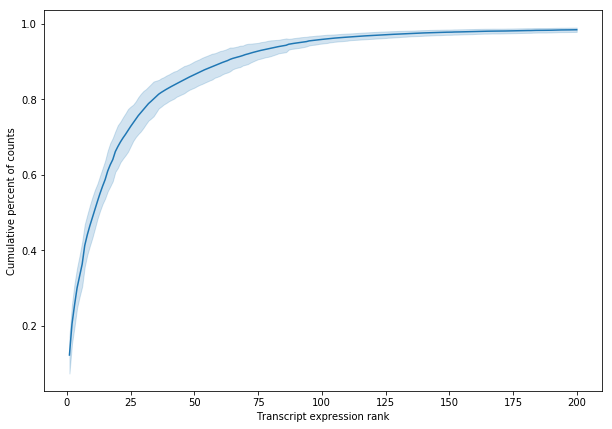

In [21]:
m = pd.read_table('output/count_matrix/PNAS2018_Plasma.txt', sep='\t', index_col=0)

nonzero_samples = (m > 0).sum(axis=1)
counts_geomean = np.exp(np.sum(np.log(np.maximum(m, 1)), axis=1)/nonzero_samples)
tx_orders = counts_geomean.sort_values(ascending=False).index.values

n_transcripts = 200
ranks = np.arange(n_transcripts) + 1
plot_data['PNAS2018_Plasma'] = []
for sample_id in m.columns:
    fraction = np.cumsum(m.loc[tx_orders[:n_transcripts], sample_id]/m.loc[:, sample_id].sum())
    plot_data['PNAS2018_Plasma'].append(pd.DataFrame({'ranks': ranks,
                                   'fraction': fraction, 
                                   'sample_id': np.full(n_transcripts, sample_id),
                                   'dataset': np.full(n_transcripts, 'PNAS2018_Plasma')
                                  }))
plot_data['PNAS2018_Plasma'] = pd.concat(plot_data['PNAS2018_Plasma'], axis=0)
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot('ranks', 'fraction', data=plot_data['PNAS2018_Plasma'], ci='sd')
#ax.plot(ranks, np.cumsum(fraction)*100, label=sample_id)
ax.set_xlabel('Transcript expression rank')
ax.set_ylabel('Cumulative percent of counts')

(0, 1)

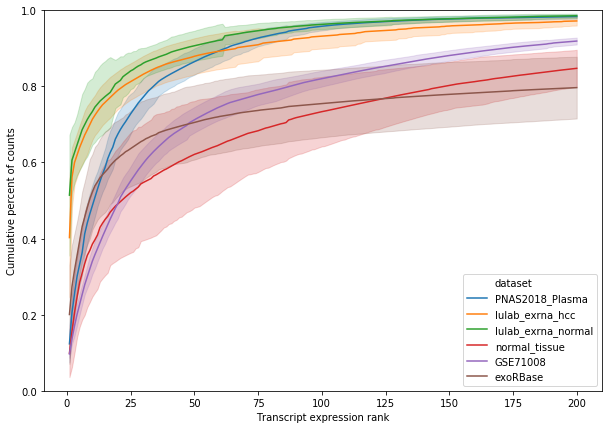

In [34]:
def prepare_culmulative_plot(matrix_file, dataset, sample_ids=None):
    m = pd.read_table(matrix_file, sep='\t', index_col=0)
    if sample_ids is not None:
        m = m.loc[:, sample_ids]
    nonzero_samples = (m > 0).sum(axis=1)
    counts_geomean = np.exp(np.sum(np.log(np.maximum(m, 1)), axis=1)/nonzero_samples)
    tx_orders = counts_geomean.sort_values(ascending=False).index.values

    n_transcripts = 200
    ranks = np.arange(n_transcripts) + 1
    plot_data = []
    for sample_id in m.columns:
        fraction = np.cumsum(m.loc[tx_orders[:n_transcripts], sample_id]/m.loc[:, sample_id].sum())
        plot_data.append(pd.DataFrame({'ranks': ranks,
                                       'fraction': fraction, 
                                       'sample_id': np.full(n_transcripts, sample_id),
                                       'dataset': dataset
                                      }))
    plot_data = pd.concat(plot_data, axis=0)
    return plot_data

plot_data = []
sample_ids = {}
sample_ids['normal'] = open('metadata/sample_ids.normal.txt', 'r').read().split()
sample_ids['hcc'] = open('metadata/sample_ids.hcc.txt', 'r').read().split()
sample_ids['normal_tissue'] = open('metadata/sample_ids.normal_tissue.txt', 'r').read().split()
plot_data.append(prepare_culmulative_plot('output/count_matrix/PNAS2018_Plasma.txt', 'PNAS2018_Plasma'))
plot_data.append(prepare_culmulative_plot('output/count_matrix/transcripts_exrna.txt', 
                                          'lulab_exrna_hcc', sample_ids=sample_ids['hcc']))
plot_data.append(prepare_culmulative_plot('output/count_matrix/transcripts_exrna.txt', 
                                          'lulab_exrna_normal', sample_ids=sample_ids['normal']))
plot_data.append(prepare_culmulative_plot('output/count_matrix/transcripts_normal_tissue.txt', 
                                          'normal_tissue'))
plot_data.append(prepare_culmulative_plot('output/count_matrix/GSE71008.txt',
                                          'GSE71008'))
plot_data.append(prepare_culmulative_plot('output/count_matrix/exoRBase.txt',
                                          'exoRBase'))

plot_data = pd.concat(plot_data, axis=0)
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot('ranks', 'fraction', hue='dataset', data=plot_data,
             ci='sd')
#ax.plot(ranks, np.cumsum(fraction)*100, label=sample_id)
ax.set_xlabel('Transcript expression rank')
ax.set_ylabel('Cumulative percent of counts')
ax.set_ylim(0, 1)

(0, 1)

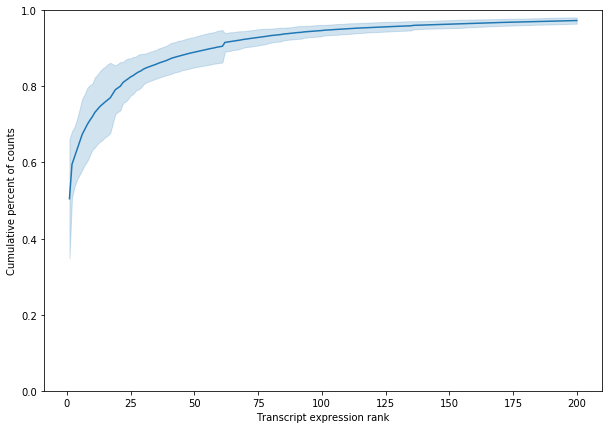

In [24]:
m = pd.read_table('output/count_matrix/transcripts_exrna.txt', sep='\t', index_col=0)
sample_ids_normal = open('metadata/sample_ids.normal.txt', 'r').read().split()
m = m.loc[:, sample_ids_normal]
nonzero_samples = (m > 0).sum(axis=1)
counts_geomean = np.exp(np.sum(np.log(np.maximum(m, 1)), axis=1)/nonzero_samples)
tx_orders = counts_geomean.sort_values(ascending=False).index.values

n_transcripts = 200
ranks = np.arange(n_transcripts) + 1
plot_data['exrna_normal'] = []
for sample_id in m.columns:
    fraction = np.cumsum(m.loc[tx_orders[:n_transcripts], sample_id]/m.loc[:, sample_id].sum())
    plot_data['exrna_normal'].append(pd.DataFrame({'ranks': ranks,
                                   'fraction': fraction, 
                                   'sample_id': np.full(n_transcripts, sample_id),
                                   'dataset': 'exrna_normal'
                                  }))
plot_data['exrna_normal'] = pd.concat(plot_data['exrna_normal'], axis=0)
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot('ranks', 'fraction', data=plot_data['exrna_normal'], ci='sd')
#ax.plot(ranks, np.cumsum(fraction)*100, label=sample_id)
ax.set_xlabel('Transcript expression rank')
ax.set_ylabel('Cumulative percent of counts')
ax.set_ylim(0, 1)

(0, 1)

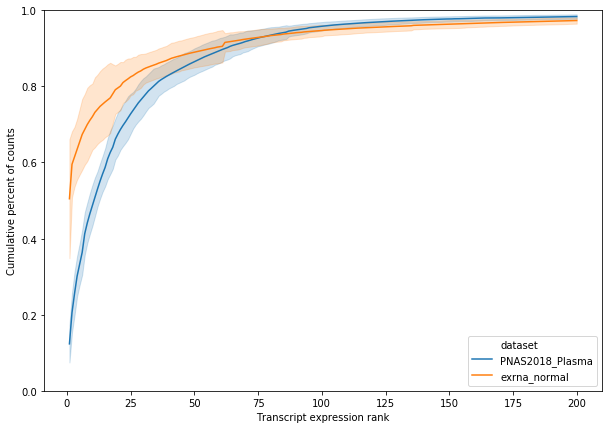

In [26]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot('ranks', 'fraction', hue='dataset', data=pd.concat(list(plot_data.values()), axis=0),
             ci='sd')
#ax.plot(ranks, np.cumsum(fraction)*100, label=sample_id)
ax.set_xlabel('Transcript expression rank')
ax.set_ylabel('Cumulative percent of counts')
ax.set_ylim(0, 1)